# Prelude

In [1]:
import pandas as pd
import landau as ld

# Load Free Energies

In [80]:
df = pd.read_pickle("MgCaFreeEnergies.pckl.gz")

In [81]:
def build(row):
    return ld.phases.TemperatureDependentLinePhase(row.phase, row.composition, row.temperature, row.free_energy, interpolator=ld.interpolate.SGTE(4))

In [82]:
df['phaseobj'] = df.apply(build, axis=1)

In [83]:
df

,phase,composition,temperature,free_energy,state,phaseobj
0,hcp Mg,0.000000,"[300.0, 300.0042000588008, 300.0084002352066, ...","[-1.5225154593605692, -1.5225168694102966, -1....",solid,"TemperatureDependentLinePhase(""hcp Mg"")"
1,bcc Ca,1.000000,"[300.0, 300.00461545700705, 300.0092310560326,...","[-1.9342844504225414, -1.9342865724018383, -1....",solid,"TemperatureDependentLinePhase(""bcc Ca"")"
2,Mg$_2$Ca,0.333333,"[300.0, 300.0042000588008, 300.0084002352066, ...","[-1.781469669607899, -1.7814711895104098, -1.7...",solid,"TemperatureDependentLinePhase(""Mg$_2$Ca"")"
4,fcc Ca,1.000000,"[300.0, 300.0042000588008, 300.0084002352066, ...","[-1.9365957848456883, -1.9365976398227, -1.936...",solid,"TemperatureDependentLinePhase(""fcc Ca"")"
14,liquid,0.333273,"[800.0, 800.0053333635558, 800.0106667982238, ...","[-2.020797043491122, -2.020801126471374, -2.02...",liquid,"TemperatureDependentLinePhase(""liquid"")"
15,liquid,0.666636,"[800.0, 800.0053333635558, 800.0106667982238, ...","[-2.161913993730873, -2.1619183103650097, -2.1...",liquid,"TemperatureDependentLinePhase(""liquid"")"
18,liquid,0.000000,"[600.0, 600.0060000600006, 600.0120002400048, ...","[-1.632069098400621, -1.6320727216435675, -1.6...",liquid,"TemperatureDependentLinePhase(""liquid"")"
19,liquid,1.000000,"[1000.0, 1000.0057143126531, 1000.011428690613...","[-2.3851575945277173, -2.3851625203296583, -2....",liquid,"TemperatureDependentLinePhase(""liquid"")"
22,liquid,0.166636,"[800.0, 800.0053333635558, 800.0106667982238, ...","[-1.9109840875275999, -1.9109880541330522, -1....",liquid,"TemperatureDependentLinePhase(""liquid"")"
23,liquid,0.500000,"[800.0, 800.0053333635558, 800.0106667982238, ...","[-2.1026342137400933, -2.102638434385509, -2.1...",liquid,"TemperatureDependentLinePhase(""liquid"")"


In [84]:
def combine(dd):
    if len(dd) == 1:
        return dd.phaseobj.iloc[0]
    else:
        return ld.phases.InterpolatingPhase(dd.phase.iloc[0], dd.phaseobj.tolist(), num_coeffs=3)

In [85]:
phases = df.groupby('phase')[df.columns].apply(combine).tolist()

# Check Interpolation

In [86]:
import matplotlib.pyplot as plt

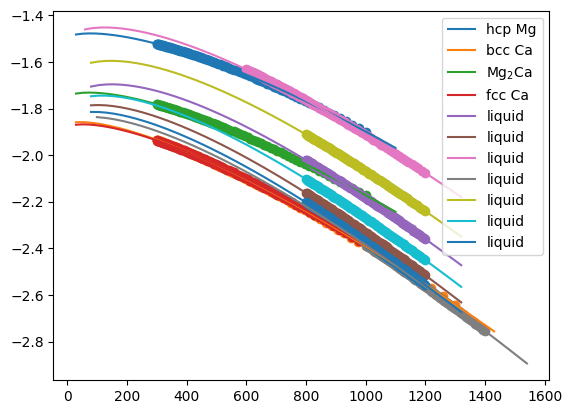

In [87]:
for p in df.phaseobj:
    p.check_interpolation(Tl=.1)
plt.legend()

# Save to Pickle

In [88]:
import pickle

In [89]:
with open("MgCaPhases.pckl", 'wb') as f:
    pickle.dump(phases, f)